In [1]:
library("data.table")
library("qtl")

In [2]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir = "./new_subsets",
                    genfile="20190827_rqtl_f15_geno.csv",
                    phefile = "20190827_rqtl_f15_pheno.csv" )

 --Read the following data:
	 780  individuals
	 1013  markers
	 7  phenotypes
 --Cross type: f2 


In [3]:
summary(datf2)

    F2 intercross

    No. individuals:    780 

    No. phenotypes:     7 
    Percent phenotyped: 100 100 100 100 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  70 
    Genotypes (%):      AA:28.8  AB:45.0  BB:26.2  not BB:0.0  not AA:0.0 

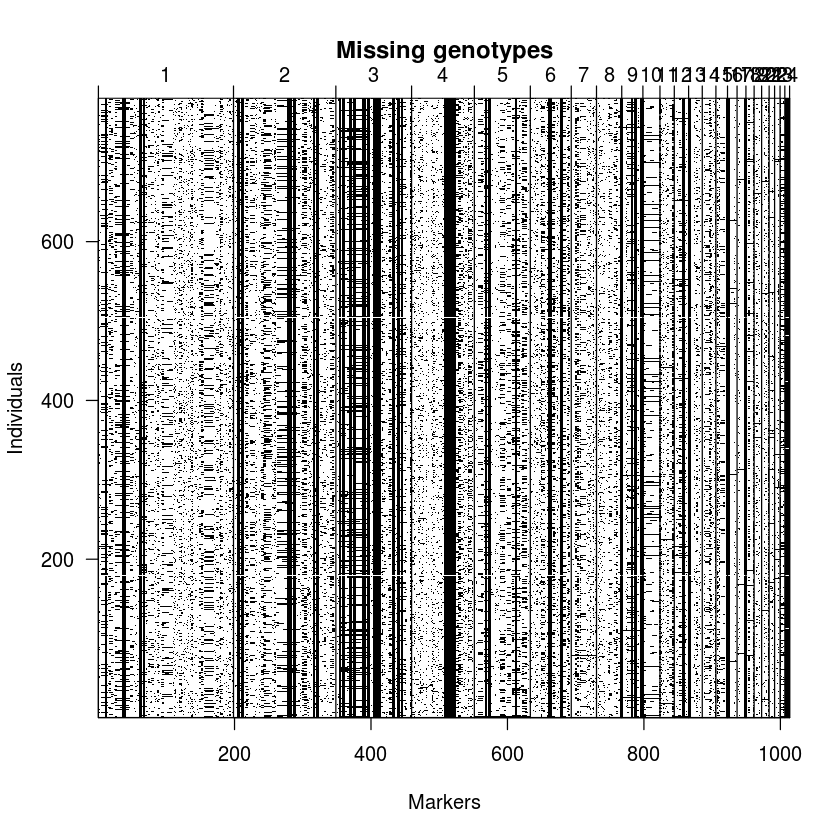

In [4]:
plotMissing(datf2)

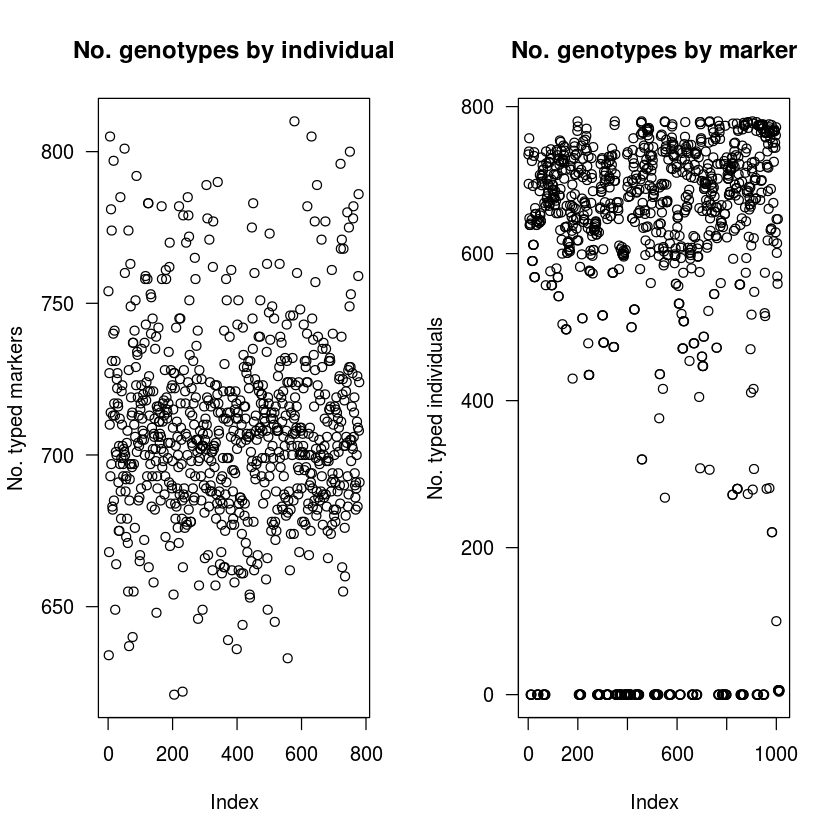

In [5]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [6]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 78]) # less than 10% of all markers


In [7]:
length(todrop)

[1] 177

In [8]:
datf2.1 <- drop.markers(datf2, todrop)

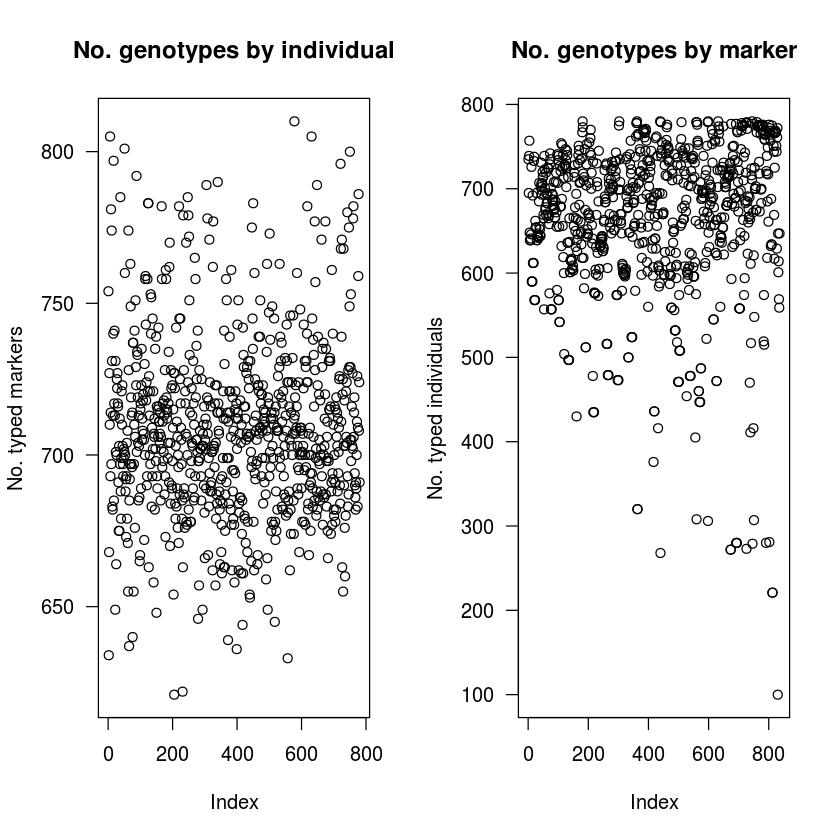

In [9]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [10]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>100)) # removing all individuals that have less than 10% of all markers


In [11]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 780

[1] 780

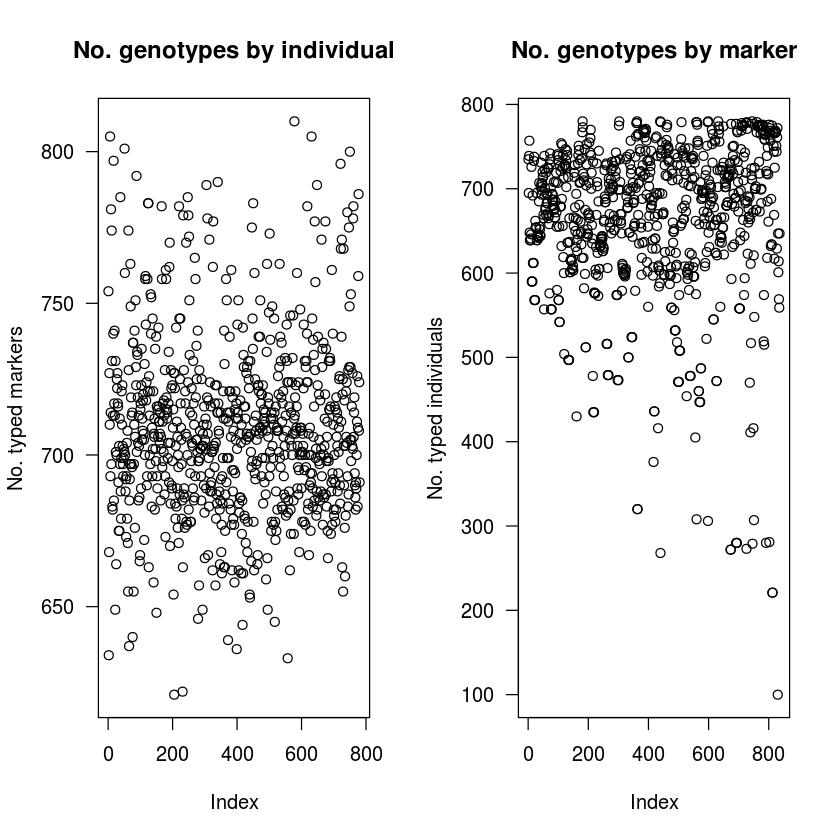

In [12]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [ ]:
summary(datf2.2)

In [13]:
cg <- comparegeno(datf2.2)

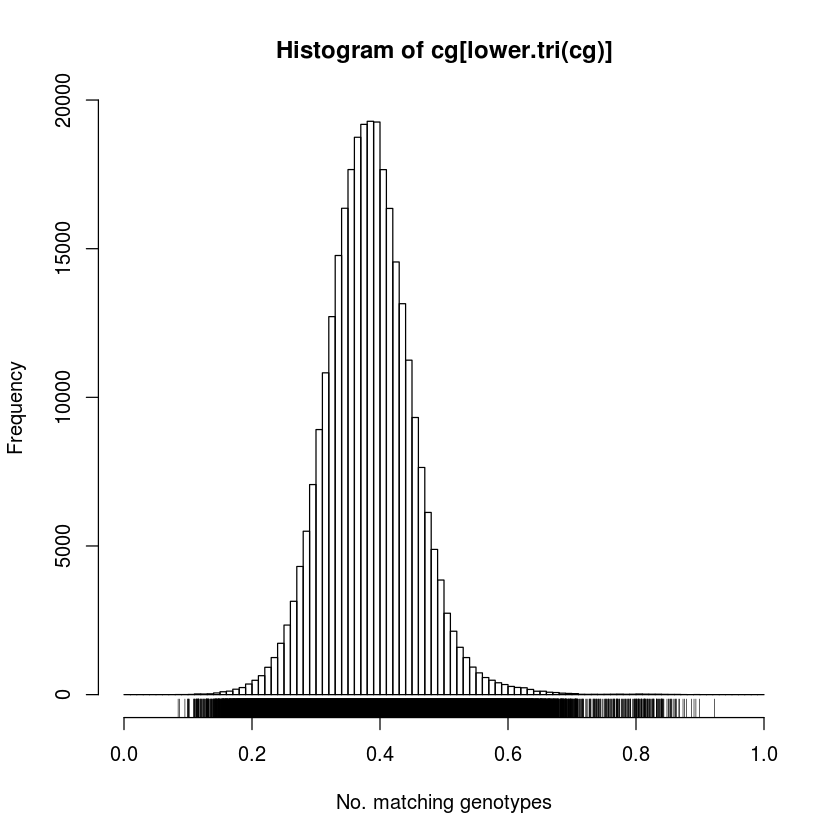

In [14]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [15]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [16]:
wh

row col 
 17 631

In [17]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-5`
[1] "1-6" "1-7" "1-8"

$`1-15`
[1] "1-16" "1-17" "1-18"

$`1-23`
[1] "1-20" "1-21" "1-22"

$`1-24`
[1] "1-25" "1-26" "1-27"

$`1-32`
[1] "1-29" "1-30" "1-31" "1-33" "1-34"

$`1-42`
[1] "1-35"

$`1-46`
[1] "1-43" "1-44" "1-45"

$`1-48`
[1] "1-49"

$`1-72`
[1] "1-71"

$`1-74`
[1] "1-75"

$`1-77`
[1] "1-78"

$`1-79`
[1] "1-80" "1-81"

$`1-84`
[1] "1-85"

$`1-90`
[1] "1-89"

$`1-93`
[1] "1-94" "1-95" "1-96"

$`1-97`
[1] "1-98" "1-99"

$`1-100`
[1] "1-101"

$`1-104`
[1] "1-103" "1-105"

$`1-109`
[1] "1-107" "1-108"

$`1-115`
[1] "1-114"

$`1-118`
[1] "1-119" "1-120"

$`1-124`
[1] "1-122" "1-123"

$`1-128`
[1] "1-129"

$`1-139`
[1] "1-138"

$`1-148`
[1] "1-149" "1-150"

$`1-151`
[1] "1-152" "1-153" "1-154"

$`1-156`
[1] "1-157" "1-158"

$`1-162`
[1] "1-159" "1-160" "1-161"

$`1-163`
[1] "1-164" "1-165" "1-166"

$`1-169`
[1] "1-168"

$`1-177`
[1] "1-176"

$`1-178`
[1] "1-179"

$`1-182`
[1] "1-181"

$`2-17`
[1] "2-18"

$`2-22`
[1] "2-20" "2-21"

$`2-41`
[1] "2-42"

$`2-45`
[1] "2-44" "2

In [18]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
"Sex column should be coded as 0=female 1=male; sex ignored."

In [19]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-1,1,45,114,391,230,0,0,2.491941e-09
1-2,1,85,59,320,316,0,0,6.051872e-43
1-3,1,41,64,327,348,0,0,3.000587e-50
1-4,1,23,82,324,351,0,0,1.196903e-45
1-5,1,132,84,306,258,0,0,1.881491e-21
1-6,1,141,84,304,251,0,0,5.233018e-20
1-7,1,141,84,304,251,0,0,5.233018e-20
1-8,1,141,84,304,251,0,0,5.233018e-20
1-9,1,139,86,304,251,0,0,1.532597e-19
1-14,1,134,87,314,245,0,0,1.283011e-17


In [20]:
length(todrop)

[1] 531

In [21]:
datf2.3 <- datf2.2

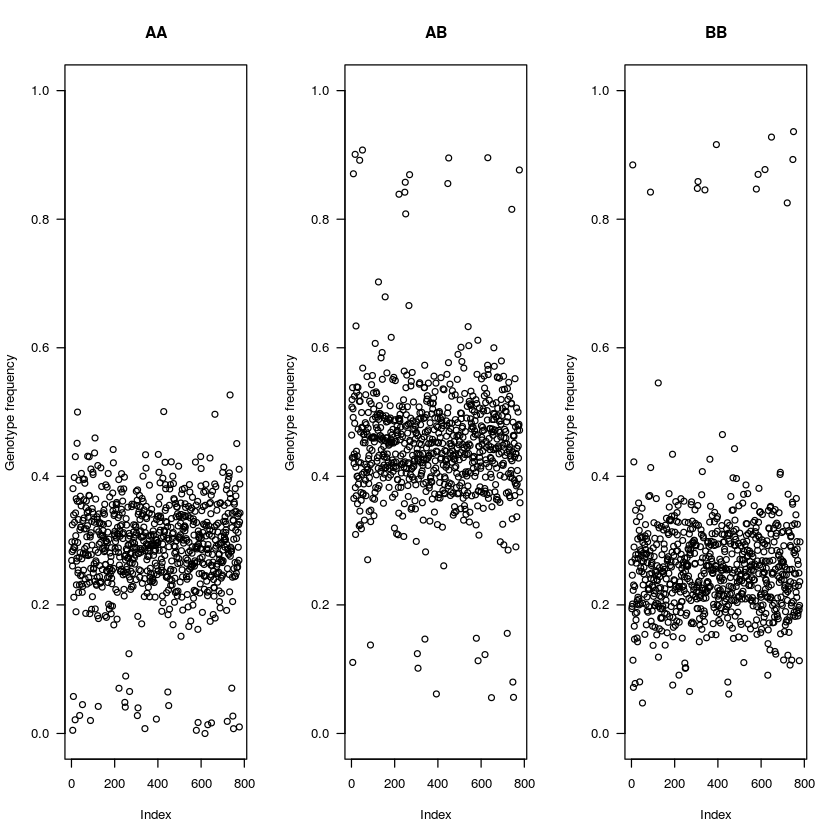

In [22]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

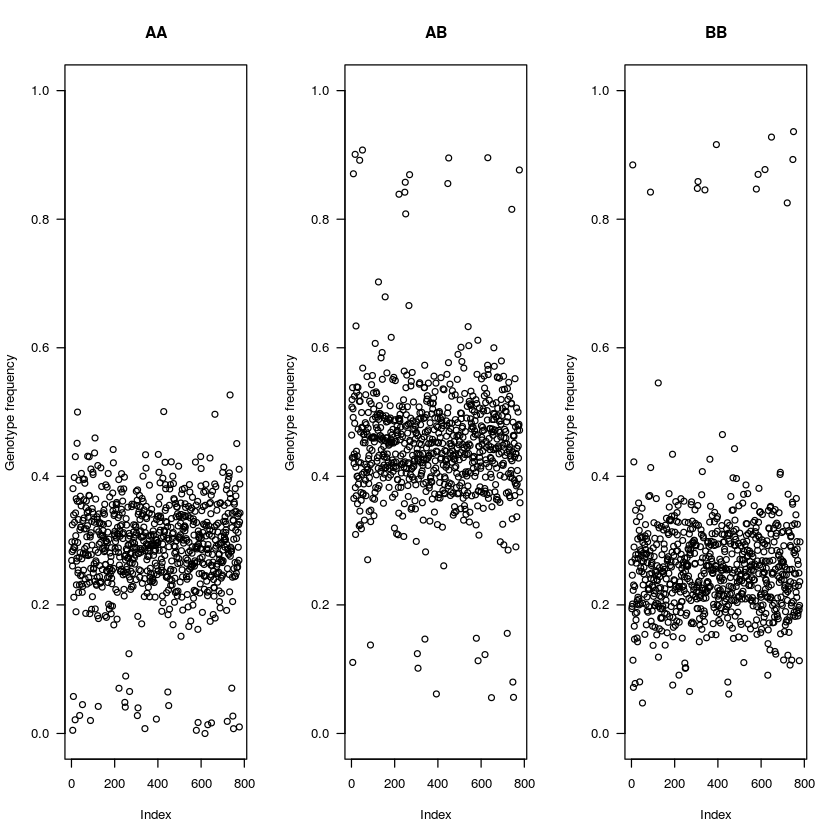

In [23]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [24]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [25]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [26]:
datf2.4 <- datf2.3

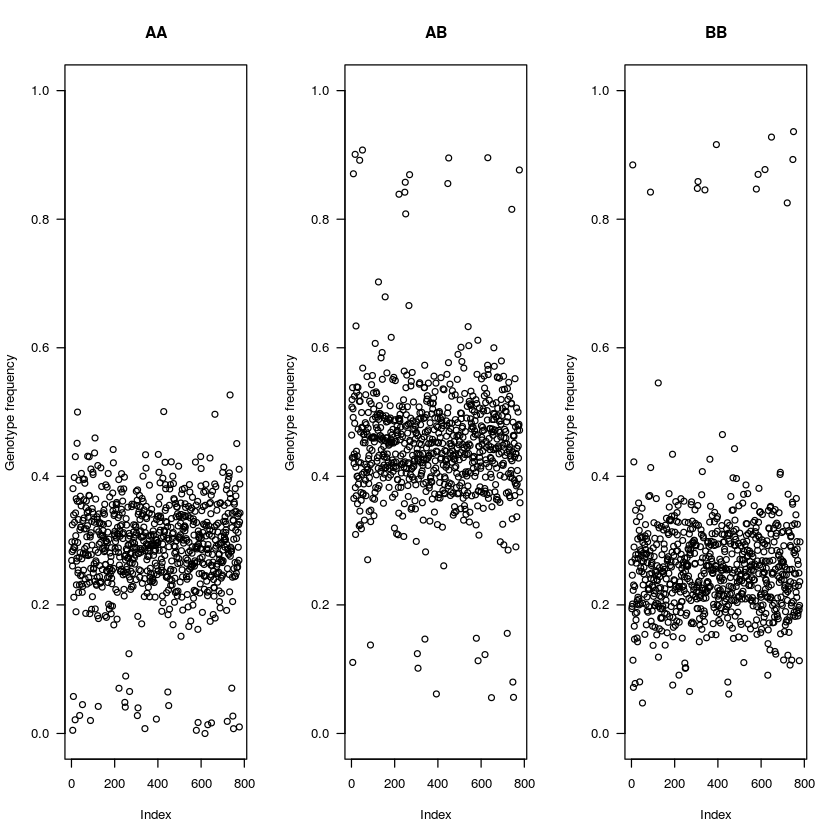

In [27]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [28]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

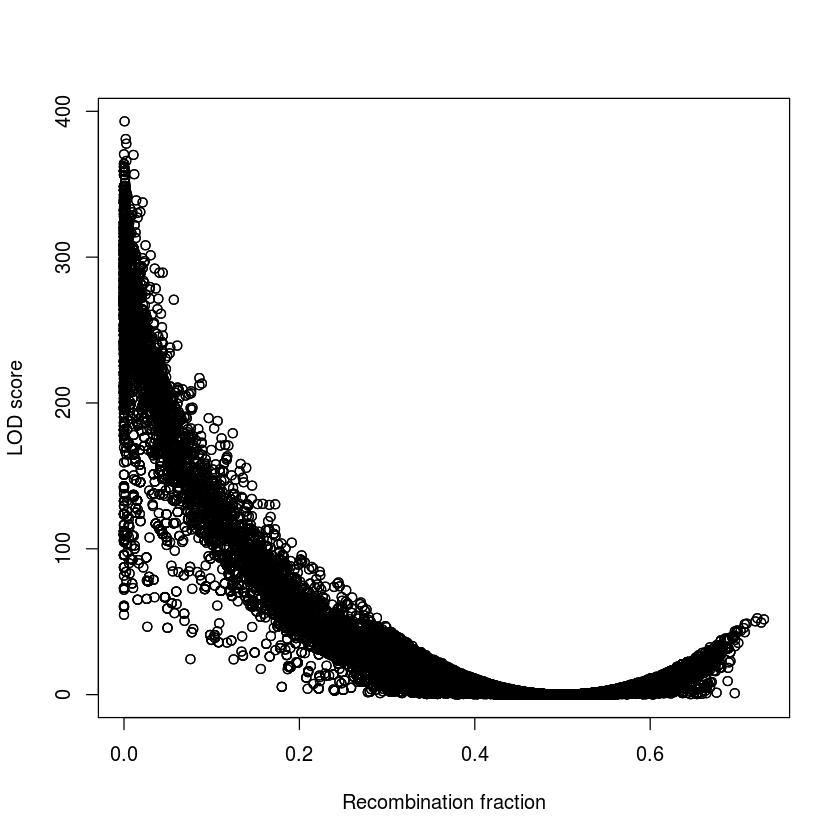

In [29]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

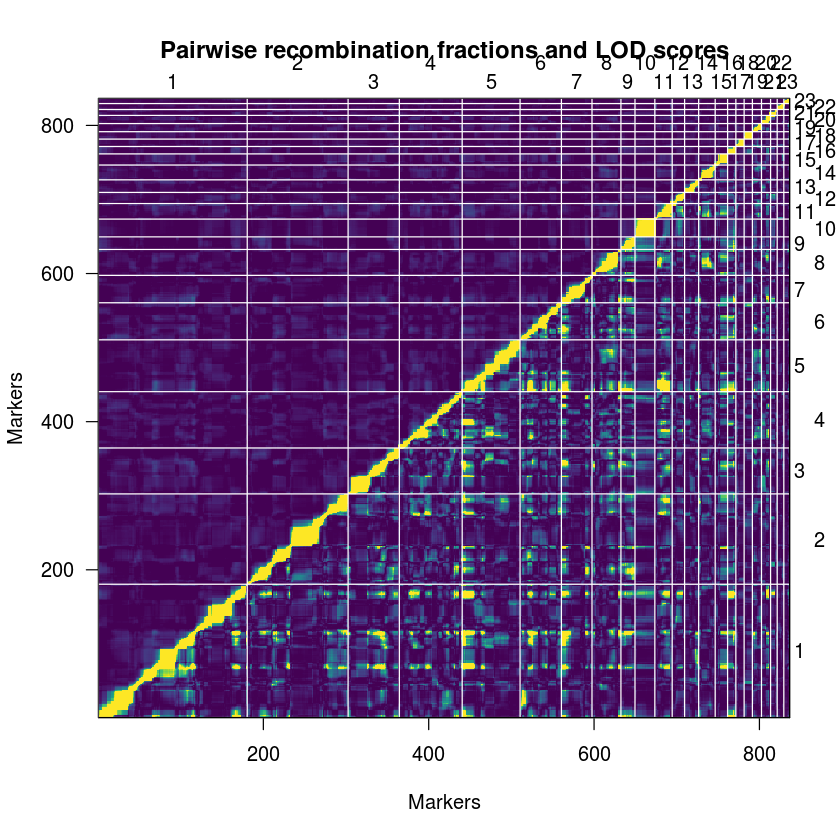

In [30]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [ ]:
genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

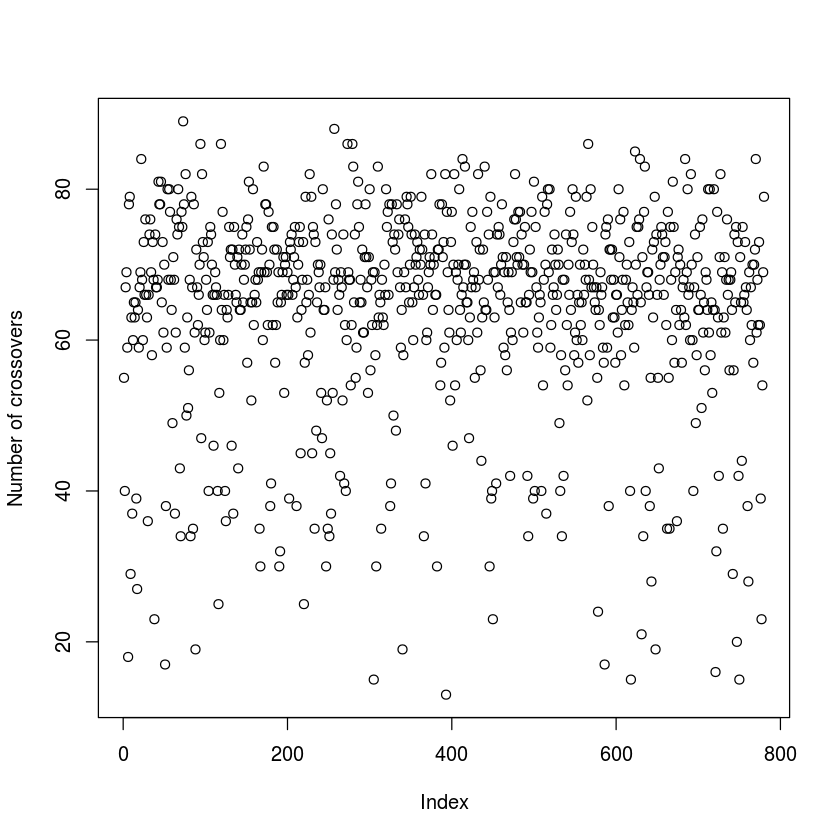

[1] 63.90897

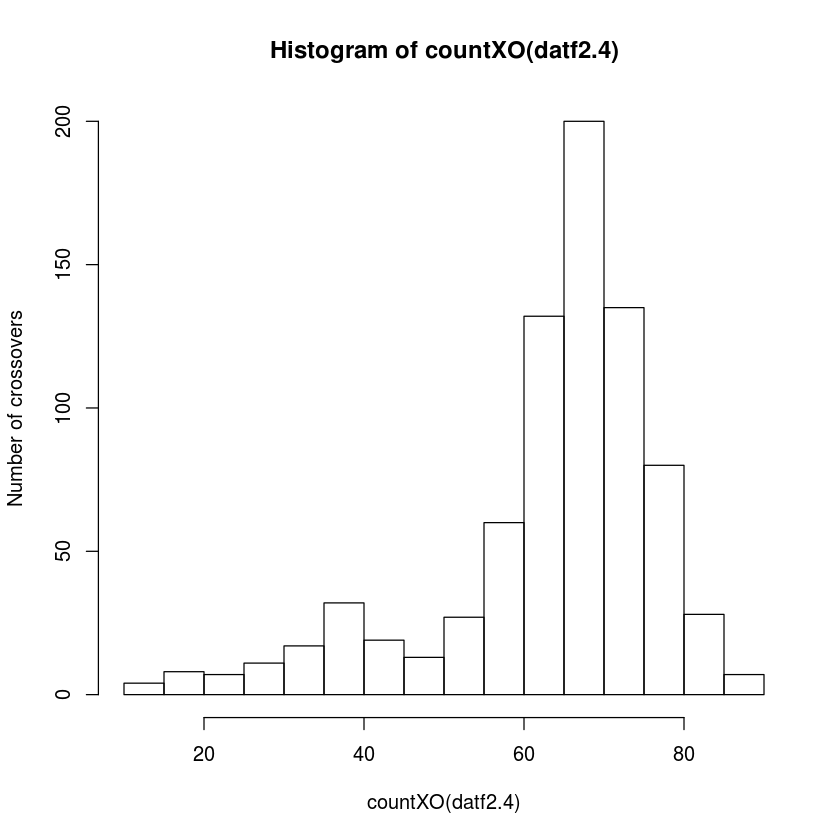

In [32]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [31]:
datf2.5 <- datf2.4

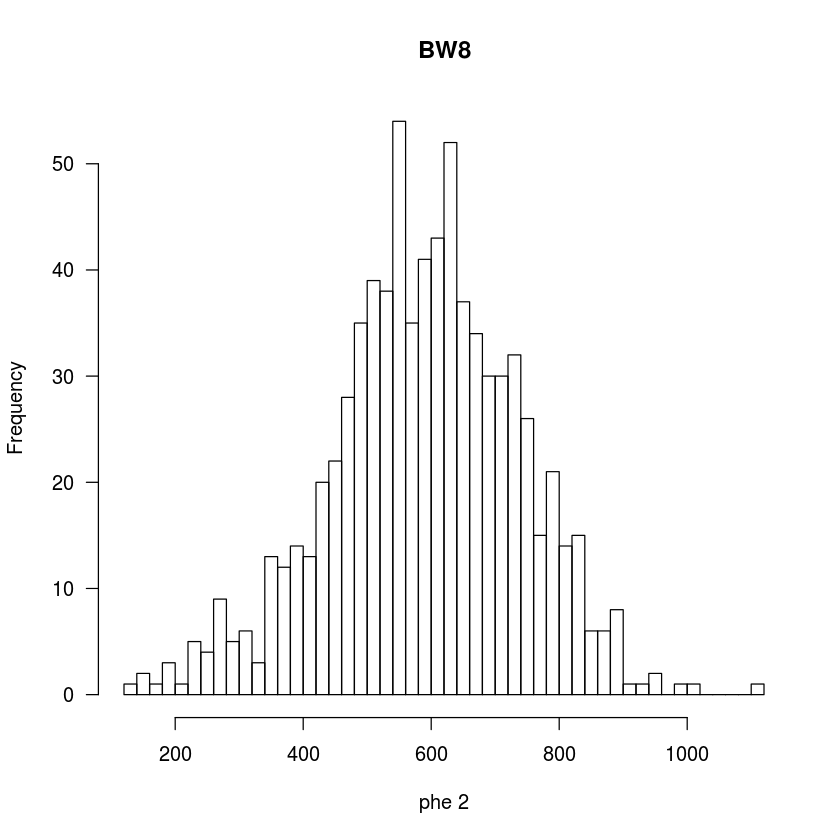

In [33]:
plotPheno(datf2.5, pheno.col =2 )

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [34]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [35]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [36]:
out.em <- scanone(datf2.5, pheno.col = 2)

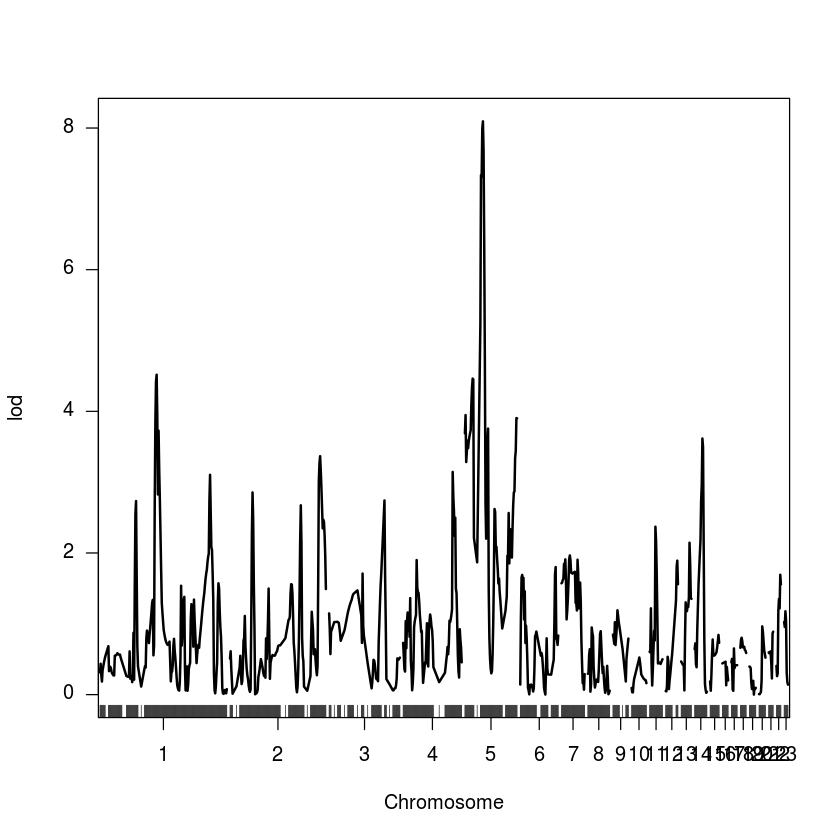

In [37]:
plot(out.em)

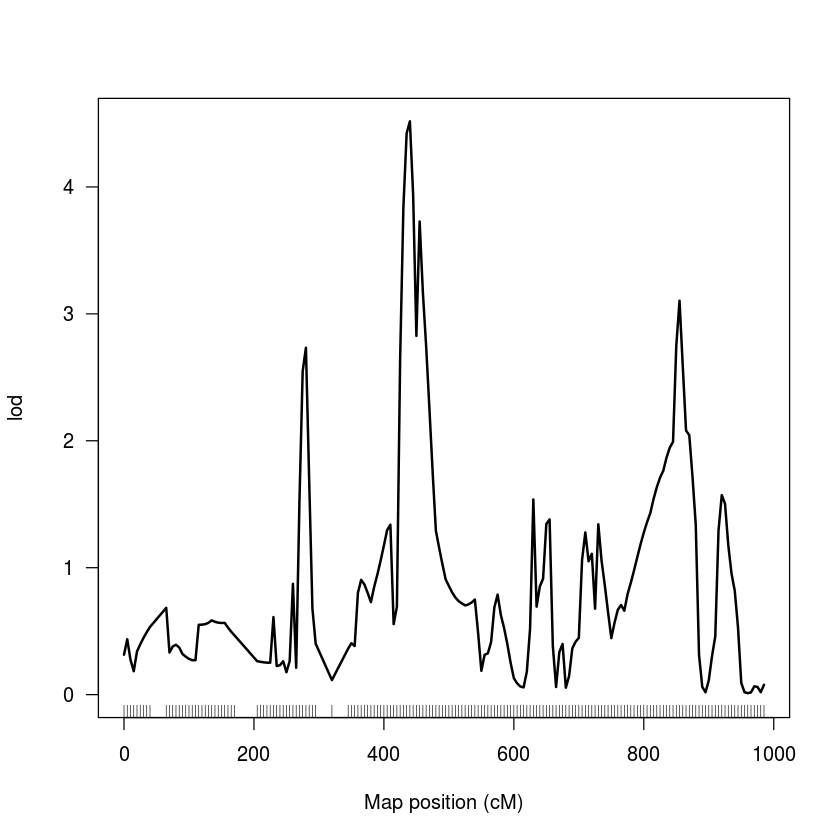

In [38]:
plot(out.em,chr=1)

In [39]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [ ]:
ac2 <- pull.pheno(datf2.5, c("SEX","DAM","SIRE"))

In [40]:
out.acovar <- scanone(datf2.5, pheno.col = 2, addcovar=ac)

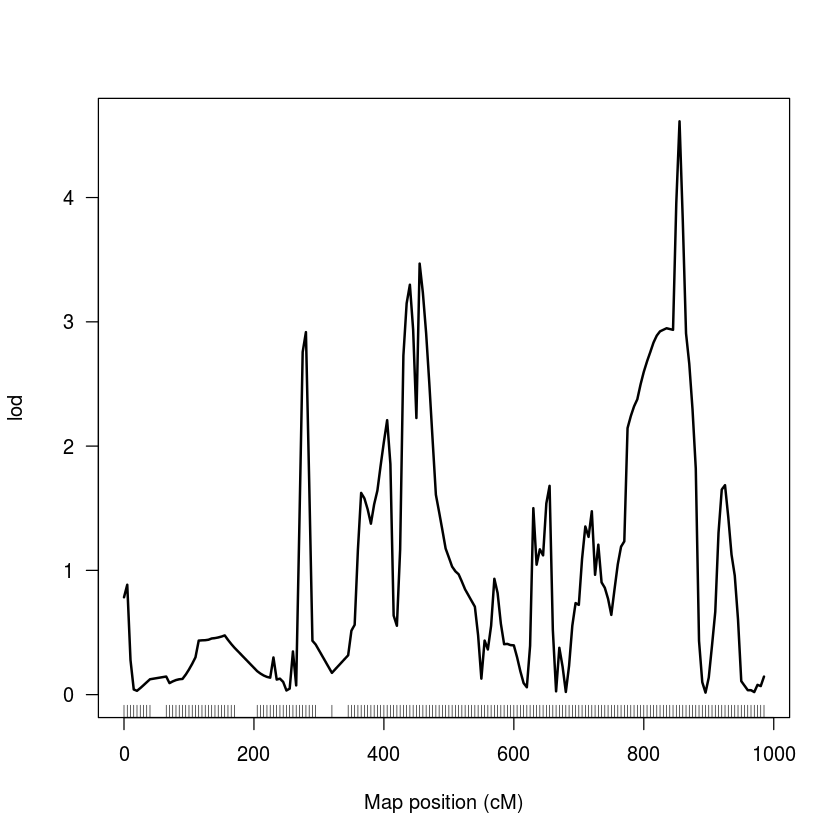

In [41]:
plot(out.acovar, chr=1)

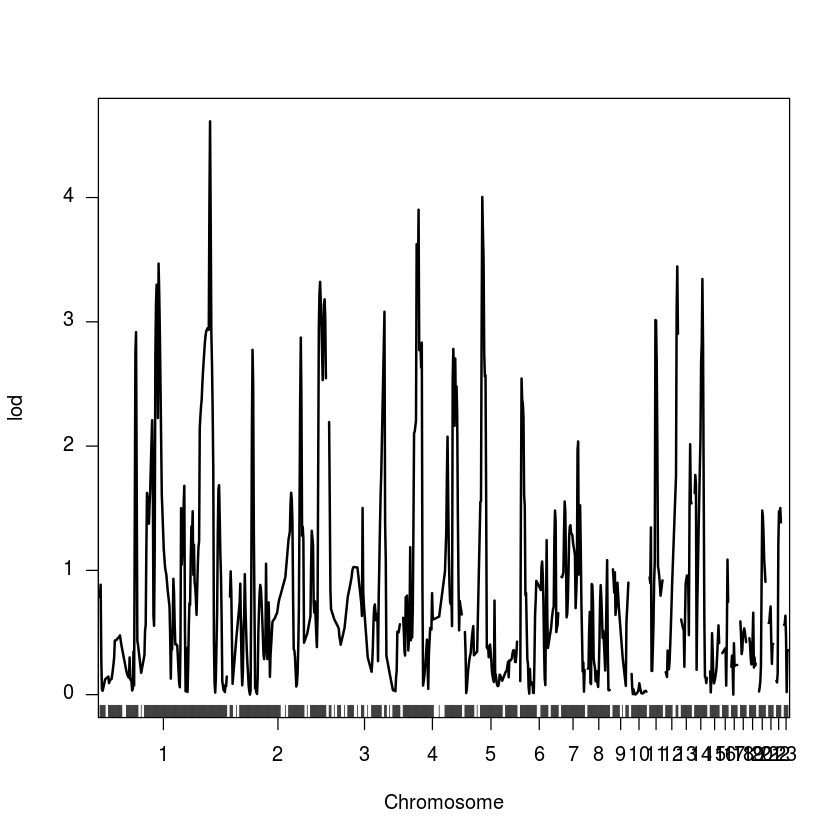

In [42]:
plot(out.acovar)

In [ ]:
plot(out.acovar, chr=1)

In [43]:
write.csv(out.acovar, "20190828_out_f15_bw8_ctrlsex.csv")

In [45]:
#out.acovar